In [41]:
import pandas as pd
import numpy as ny
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [42]:
bank = pd.read_csv("/Users/Sys/Downloads/bank-full.csv",sep=';')

In [43]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [44]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Label Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
x=bank.iloc[:,:-1]
string=['job','marital','education','default','housing','loan','contact','month',
           'poutcome']
for i in string:
    x[i]=LabelEncoder().fit_transform(bank[i])

In [46]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [58]:
x.shape

(45211, 16)

In [47]:
y=bank.iloc[:,-1:]

In [48]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [49]:
y = y.values.ravel()

y_labelencoder = LabelEncoder()
y=y_labelencoder.fit_transform(y[:])
print(y)

In [51]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(x,test_size=.2,random_state=0)
train_y,test_y=train_test_split(y,test_size=.2,random_state=0)


In [66]:
#Scalling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x= scaler.fit_transform(test_x)
train_x,test_x,train_y,test_y

(array([[ 1.51506117, -1.33082962, -1.91917636, ..., -0.41022192,
         -0.24140505,  0.44433241],
        [-0.36959746,  2.03279341, -0.27704789, ..., -0.41022192,
         -0.24140505,  0.44433241],
        [-0.55806332,  1.42122559, -1.91917636, ...,  0.56072806,
          0.58572055, -2.58671521],
        ...,
        [-0.55806332, -0.10769397, -0.27704789, ..., -0.41022192,
         -0.24140505,  0.44433241],
        [ 2.74008927,  0.19808994, -0.27704789, ...,  1.42157032,
          0.17215775, -2.58671521],
        [ 0.47849892, -1.0250457 ,  1.36508059, ..., -0.41022192,
         -0.24140505,  0.44433241]]),
 array([[-0.37504691, -0.08839255, -0.27059763, ..., -0.41636207,
         -0.31975228,  0.44717154],
        [-0.46898783,  0.82582838,  1.38167407, ..., -0.41636207,
         -0.31975228,  0.44717154],
        [ 0.56436234, -1.00261349, -0.27059763, ..., -0.41636207,
         -0.31975228,  0.44717154],
        ...,
        [-1.22051523,  0.82582838, -0.27059763, ..., -

In [67]:
test_y

array([0, 1, 0, ..., 0, 1, 0])

In [68]:
classifier=LogisticRegression(random_state=0)
classifier.fit(train_x,train_y)

LogisticRegression(random_state=0)

In [69]:
y_pred=classifier.predict(test_x)
print(y_pred)

[0 1 0 ... 0 0 0]


In [75]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [76]:
results= pd.crosstab(test_y,y_pred, rownames=['Act'], colnames=['Pred'])
print(results)

Pred     0    1
Act            
0     7797  183
1      825  238


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
print (cm)

[[7797  183]
 [ 825  238]]


In [78]:
import numpy as np
Accuracy=np.sum([cm[0,0],cm[1,1]])/np.sum(cm)
print(Accuracy)

0.8885325666261197


In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7980
           1       0.57      0.22      0.32      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



In [80]:
fpr, tpr, thresholds = roc_curve(test_y, classifier.predict_proba (test_x)[:,1])

In [82]:
auc = roc_auc_score(test_y, y_pred)

Text(0, 0.5, 'True Positive Rate')

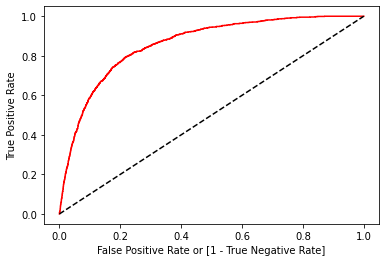

In [83]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [84]:
print(auc)

0.600481153495215


In [85]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [90]:
bank1=bank.drop(['duration'],axis=1)

In [91]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
x1=bank.iloc[:,:-1]
string=['job','marital','education','default','housing','loan','contact','month',
           'poutcome']
for i in string:
    x1[i]=LabelEncoder().fit_transform(bank1[i])

In [93]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [97]:
y1=bank1.iloc[:,-1:]

In [98]:
y1 = y1.values.ravel()

In [99]:
y1_labelencoder = LabelEncoder()
y1=y1_labelencoder.fit_transform(y1[:])
print(y1)

[0 0 0 ... 1 0 0]


In [113]:
from sklearn.model_selection import train_test_split
train_x1,test_x1=train_test_split(x1,test_size=.3,random_state=0)
train_y1,test_y1=train_test_split(y1,test_size=.3,random_state=0)

In [114]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_x1=scaler.fit_transform(train_x1)
test_x1= scaler.fit_transform(test_x1)
train_x1,test_x1,train_y1,test_y1

(array([[ 1.61519942, -0.10586083, -0.27522248, ..., -0.41108056,
         -0.23732307,  0.44500447],
        [ 1.33172021, -1.02355015, -0.27522248, ..., -0.41108056,
         -0.23732307,  0.44500447],
        [ 0.85925485, -1.32944659, -0.27522248, ..., -0.41108056,
         -0.23732307,  0.44500447],
        ...,
        [-0.55814123, -0.10586083, -0.27522248, ..., -0.41108056,
         -0.23732307,  0.44500447],
        [ 2.74911628,  0.2000356 , -0.27522248, ...,  1.41924396,
          0.16898275, -2.58556501],
        [ 0.48128256, -1.02355015,  1.36352933, ..., -0.41108056,
         -0.23732307,  0.44500447]]),
 array([[-0.3742539 , -0.09907635, -0.27704587, ..., -0.41232297,
         -0.30326003,  0.44465109],
        [-0.46769854,  0.81532939,  1.37985454, ..., -0.41232297,
         -0.30326003,  0.44465109],
        [ 0.56019248, -1.01348209, -0.27704587, ..., -0.41232297,
         -0.30326003,  0.44465109],
        ...,
        [-0.18736463, -0.40387827, -0.27704587, ..., -

In [115]:
classifier=LogisticRegression(random_state=0)
classifier.fit(train_x1,train_y1)

LogisticRegression(random_state=0)

In [116]:
y1_pred=classifier.predict(test_x1)
print(y1_pred)

[0 1 0 ... 0 0 0]


In [117]:
results1= pd.crosstab(test_y1,y1_pred, rownames=['Act'], colnames=['Pred'])
print(results1)

Pred      0    1
Act             
0     11697  272
1      1245  350


In [120]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(test_y1,y1_pred)
print (cm1)

[[11697   272]
 [ 1245   350]]


In [121]:
import numpy as np
Accuracy1=np.sum([cm1[0,0],cm1[1,1]])/np.sum(cm1)
print(Accuracy1)

0.8881598348569744


In [122]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print(classification_report(test_y1,y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.22      0.32      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.63     13564
weighted avg       0.86      0.89      0.87     13564



In [123]:
fpr, tpr, thresholds = roc_curve(test_y1, classifier.predict_proba (test_x1)[:,1])

In [124]:
auc = roc_auc_score(test_y1, y1_pred)

Text(0, 0.5, 'True Positive Rate')

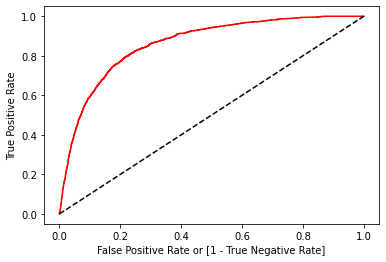

In [125]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [126]:
print(auc)

0.5983551813972932
